# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import io 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

# **Load dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Thesis Slide/Datasets /bangla_online_comments_dataset.xlsx")

In [5]:
data

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


In [6]:
data=data.drop(['Category','Gender','comment react number'],axis=1)

In [7]:
data

,comment,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully
4,পটকা মাছ,troll
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [8]:
print(data.dtypes)

comment    object
label      object
dtype: object


In [9]:
data.isnull().sum()

comment    0
label      0
dtype: int64

In [10]:
data

,comment,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully
4,পটকা মাছ,troll
...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [11]:
#Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series

#data['comment_text'] = data['comment_text'].str.replace('“”‘’','')
#data['comment_text'] = data['comment_text'].str.replace('’‘“”,'')
data['comment'] = data['comment'].str.replace('।','')

data['comment'] = data['comment'].apply(remove_punctuations)

In [12]:
data['comment'].head(40000)

0        ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1         ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2                                  অরে বাবা এই টা কোন পাগল
3                                    ক্যাপ্টেন অফ বাংলাদেশ
4                                                 পটকা মাছ
                               ...                        
39995                   হিরু আলমকে সাহসিকতার জন্য ধন্যবাদ৷
39996                                হিরো আলম ভাই কেমন আছো
39997                                    এত গসাগসির কি আছে
39998    তাহার গরতে আমার চা ঢালার খুব ইচ্ছা একবার যদি প...
39999      একজন মুসলমান হয়ে এক হিন্দু মানুষ কে বিবাহ করলেন
Name: comment, Length: 40000, dtype: object

In [13]:
data['comment'] = data['comment'].str.replace('৷','')

In [14]:
data['comment'] = data['comment'].str.replace('\n','')

In [15]:
#Remove emojis
import re


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u09E6-\u09EF"#banglanumerical code
                               u"\u0030-\u0039"#englishnumercal code
                               u"\u0041-\u005A"#uppercaseenglish alphabet
                               u"\u0061-\u007A"#lowercaseenglish alphabet
                               u"\u2019"
                               u"\u2018"
                               u"\u201C"
                               u"\u201D"
                               u"\u201E"
                               u"\u201F"

                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['new']=data['comment'].apply(remove_emoji)

In [16]:
data

,comment,label,new
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2,অরে বাবা এই টা কোন পাগল,not bully,অরে বাবা এই টা কোন পাগল
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully,ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,troll,পটকা মাছ
...,...,...,...
43996,হিরো আলম এগিয়ে যাও,not bully,হিরো আলম এগিয়ে যাও
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...
43998,হিরো ভাই তুমি এগিয়ে য়াও,not bully,হিরো ভাই তুমি এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি


In [17]:
columns_titles = ["new","comment","label"]
Cyberbully_data=data.reindex(columns=columns_titles)

In [18]:
Cyberbully_data

,new,comment,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,not bully
2,অরে বাবা এই টা কোন পাগল,অরে বাবা এই টা কোন পাগল,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,ক্যাপ্টেন অফ বাংলাদেশ,not bully
4,পটকা মাছ,পটকা মাছ,troll
...,...,...,...
43996,হিরো আলম এগিয়ে যাও,হিরো আলম এগিয়ে যাও,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [19]:
#Tokenization
import nltk
nltk.download('punkt')
Cyberbully_data['new'] = Cyberbully_data.apply(lambda row: nltk.word_tokenize(row['new']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
stw = pd.read_csv("/content/drive/MyDrive/Thesis Slide/Datasets /stopwords-bn.csv")
stw.columns = ['Words']
stw.head()
stw = stw['Words']
stw.shape

(397,)

In [21]:
stop_words = ['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য','দেখাচ্ছে','এইসব','একই','চায়','দিয়ে','অথচ','নিয়ে','বাকি','কিন্তু','এদের','অনেক','পারেনা','দেখান' ,'এক' ,'হয়ে','করছে ','ছাড়া','তুই','তোর','তুমিও','দেয়া ','থেকে','ওয়া','নিজার','ছিঃ','কিছু','থাকে','তুর','তো','তরফ','দিয়েছে','রেখে', 'গেছে ','তে',
      'আপনারা','অর','একটু','আপনাদেরকে','তোমাকে','একজন''দেয়া','আপনারটা','আপনাকে','মত','আপনিও','আপনিই','আনা','হয়েছে','আজকে','তোরে','আজও','আছোস','আছি','আচ্ছা','আজকে','আছিলি','আছিস','আছেন','আগেও','আমরাও','আমিও','আরে','আরেক','আরেকজনকে','করছি','আসেন','ইউ','ইকটু','ইয়ে','ইয়েস']
for i in range(stw.shape[0]):
    stop_words.append(stw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

Cyberbully_data['new']=Cyberbully_data['new'].apply(lambda x: [item for item in x if item not in stop_words])

<class 'list'>
581
['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা', 'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়', 'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন', 'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার', 'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে', 'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর', 'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা', 'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের', 'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি', 'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য', 'দেখাচ্ছে', 'এইসব', 'একই', 'চায়', 'দি

In [22]:
Cyberbully_data

,new,comment,label
0,"[হালার, পুত, মদ, খাওয়ার, রাতের, বেলা, মদ, খাই...",ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,"[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,not bully
2,"[অরে, বাবা, টা, পাগল]",অরে বাবা এই টা কোন পাগল,not bully
3,"[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ,not bully
4,"[পটকা, মাছ]",পটকা মাছ,troll
...,...,...,...
43996,"[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও,not bully
43997,"[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ]",হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,not bully
43998,"[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই তুমি এগিয়ে য়াও,not bully
43999,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে]",হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,not bully


In [23]:
Cyberbully_data["joint"]= Cyberbully_data["new"].str.join(" ")

In [24]:
Cyberbully_data['label'].value_counts()

not bully    15340
troll        10462
sexual        8928
religious     7577
threat        1694
Name: label, dtype: int64

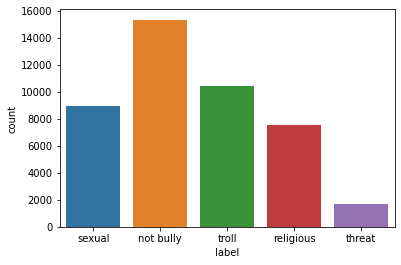

In [25]:
import seaborn as sns
sns.countplot(x='label',data=Cyberbully_data)

In [26]:
#import label encoder 
from sklearn import preprocessing
#creating object
LE= preprocessing.LabelEncoder()
#Encode 
Cyberbully_data['new_label'] = LE.fit_transform(Cyberbully_data['label']) 

## **Five classes** 
*   Religious: 1
*   Sexual: 2
*   Threat: 3
*   Troll: 4
*   Not Bully: 0 








In [27]:
Cyberbully_data.new_label

0        2
1        0
2        0
3        0
4        4
        ..
43996    0
43997    0
43998    0
43999    0
44000    0
Name: new_label, Length: 44001, dtype: int64

In [28]:
#formulticlassifcation classification
coun_vect = CountVectorizer(ngram_range=(1,2),tokenizer=lambda x: x.split())
# We transform each complaint into a vector
features1 = coun_vect.fit_transform(Cyberbully_data['joint'])
labels1 = Cyberbully_data.new_label
print("Each of the %d complaints is represented by %d features (Count-vectorizer score of unigrams and bigrams)" %(features1.shape))

Each of the 44001 complaints is represented by 362343 features (Count-vectorizer score of unigrams and bigrams)


In [29]:
coun_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['¡',
 '¡চলেন',
 '¡চলেন রিপোর্ট',
 '®',
 '® অমানুষের',
 '¯…………………………………………',
 '¯………………………………………… ·´……………………………………………',
 '°',
 '° পারবো',
 '·´……………………………………………',
 '·´…………………………………………… পাছা',
 '»',
 '» »',
 '×',
 '× বুজাতে',
 '× মাস',
 '×××',
 '×তাহলে',
 '×তাহলে টোটাল',
 '×পৌরসভা',
 '×পৌরসভা মততাহলে',
 'ßø',
 'ßø ưą',
 'à',
 'ã',
 'ã ãâî',
 'ãâî',
 'ãäñ',
 'ãäñ ã',
 'ä',
 'ä à',
 'ï',
 'ï ℘',
 'ķ',
 'ķ řøī',
 'řøī',
 'ơ',
 'ơ ῳ',
 'ưą',
 'ɛ',
 'ɛ ཞ',
 'π',
 'ءَأَنذَرْتَهُمْ',
 'ءَأَنذَرْتَهُمْ أَمْ',
 'ءَامَنَ',
 'ءَامَنَ ٱلسُّفَهَآءُ',
 'ءَامَنَ ٱلنَّاسُ',
 'ءَامَنُوا۟',
 'ءَامَنُوا۟ رَبَّنَا',
 'ءَامَنُوا۟ ٱدْخُلُوا۟',
 'ءَامِنُوا۟',
 'ءَامِنُوا۟ كَمَآ',
 'آمَنُوا',
 'آمَنُوا لَهُمْ',
 'آَيَاتُنَا',
 'آَيَاتُنَا قَالَ',
 'أبىْ',
 'أبىْ هريْرة',
 'أَبْصَارِهِمْ',
 'أَبْصَارِهِمْ وَيَحْفَظُوا',
 'أَبْصَارِهِنَّ',
 'أَبْصَارِهِنَّ وَيَحْفَظْ',
 'أَثِيمٍ',
 'أَثِيمٍ إِذَا',
 'أَجْرًا',
 'أَجْرًا كَبِيرًاইন্না',
 'أَزْكَىٰ',
 'أَزْكَىٰ لَهُمْ',
 'أَسَاطِيرُ',
 'أَسَاطِيرُ الْأَوَّلِينَ',


In [30]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from collections import Counter
from matplotlib import pyplot
oversamplee = RandomOverSampler()
Xx, Yy = oversamplee.fit_resample(features1,labels1)
counter = Counter(Yy)
print(counter)

Counter({2: 15340, 0: 15340, 4: 15340, 1: 15340, 3: 15340})


In [31]:
#formulticlass
X_train, X_test, y_train, y_test = train_test_split(Xx,Yy, 
                                                    test_size=0.15,
                                                    random_state = 1,stratify=Yy)

In [32]:
MNB = MultinomialNB().fit(X_train,y_train)
LR = LogisticRegression(multi_class='ovr').fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
DT = DecisionTreeClassifier().fit(X_train,y_train)
RF = RandomForestClassifier().fit(X_train,y_train)

In [34]:
y_predNB = MNB.predict(X_test)
y_predLR=LR.predict(X_test)
y_predDT=DT.predict(X_test)
y_predRF=RF.predict(X_test)

In [35]:
print('Naive Bayes')
print('Accuracy:', accuracy_score(y_test, y_predNB))

Naive Bayes
Accuracy: 0.8521512385919165


In [36]:
cm = confusion_matrix(y_test,y_predNB)

In [37]:
cm_plot_labels = ['Not bully','Religious','Sexual','Threat','Troll']

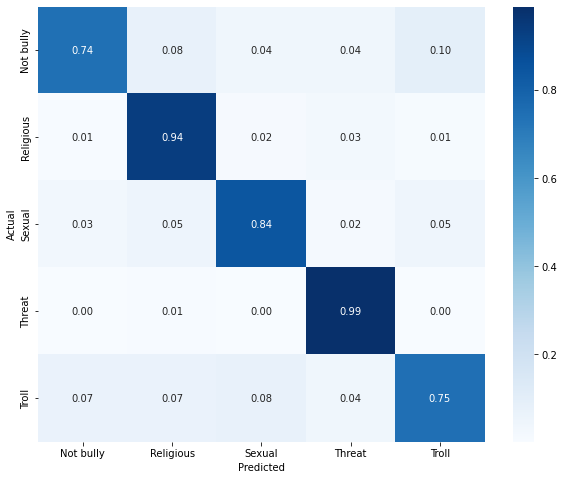

In [38]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2301
           1       0.82      0.94      0.87      2301
           2       0.86      0.84      0.85      2301
           3       0.89      0.99      0.93      2301
           4       0.82      0.75      0.78      2301

    accuracy                           0.85     11505
   macro avg       0.85      0.85      0.85     11505
weighted avg       0.85      0.85      0.85     11505



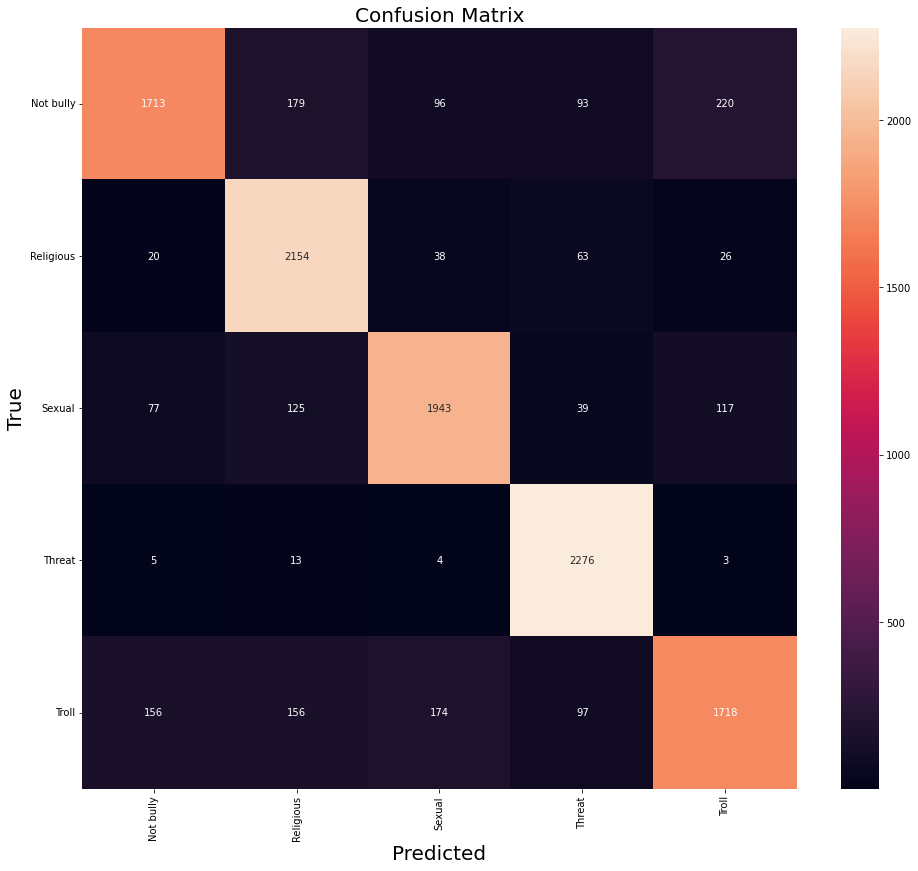

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predNB)

## Get Class Labels

class_names = ['Not bully','Religious','Sexual','Threat','Troll']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [41]:
print('Logistic regression')
print('Accuracy:', accuracy_score(y_test, y_predLR))

Logistic regression
Accuracy: 0.9087353324641461


In [42]:
cm = confusion_matrix(y_test,y_predLR)

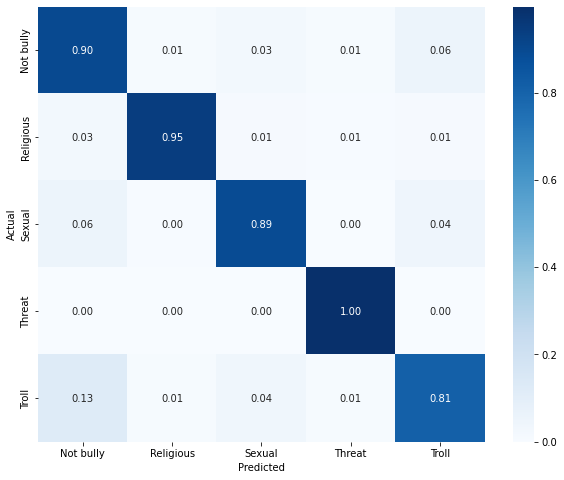

In [43]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [44]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2301
           1       0.97      0.95      0.96      2301
           2       0.92      0.89      0.90      2301
           3       0.97      1.00      0.99      2301
           4       0.88      0.81      0.84      2301

    accuracy                           0.91     11505
   macro avg       0.91      0.91      0.91     11505
weighted avg       0.91      0.91      0.91     11505



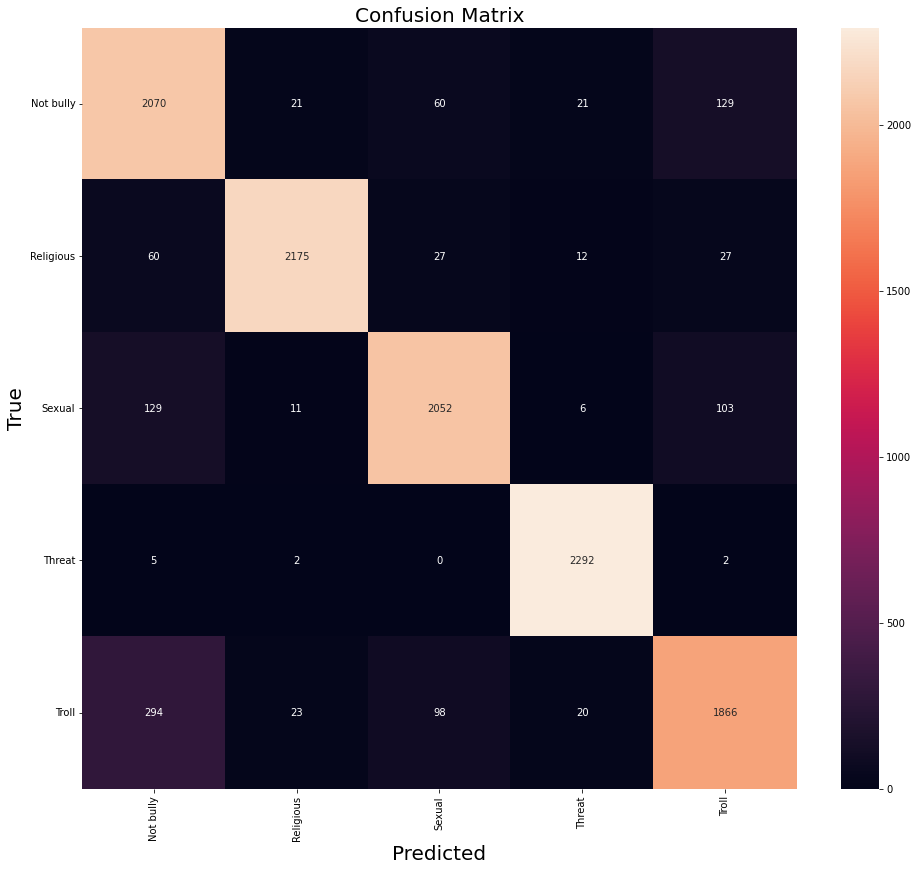

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predLR)

## Get Class Labels

class_names = ['Not bully','Religious','Sexual','Threat','Troll']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [46]:
print('Decision Tree')
print('Accuracy:', accuracy_score(y_test, y_predDT))

Decision Tree
Accuracy: 0.8936983920034768


In [47]:
cm = confusion_matrix(y_test,y_predDT)

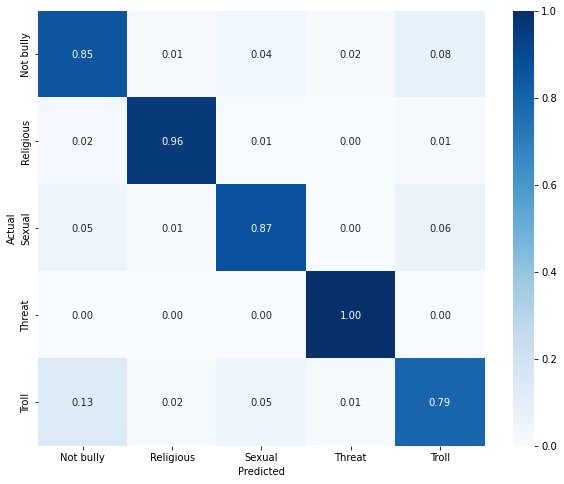

In [48]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

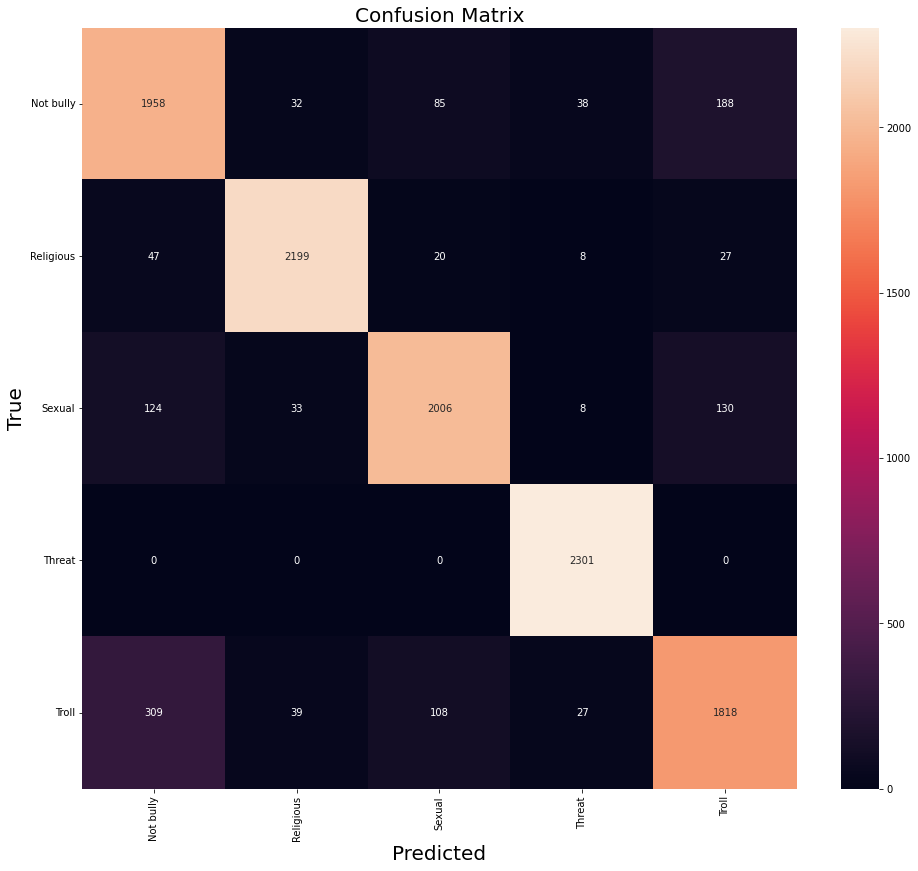

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predDT)

## Get Class Labels

class_names = ['Not bully','Religious','Sexual','Threat','Troll']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [50]:
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, y_predRF))

Random Forest
Accuracy: 0.9031725336810082


In [51]:
cm = confusion_matrix(y_test,y_predRF)

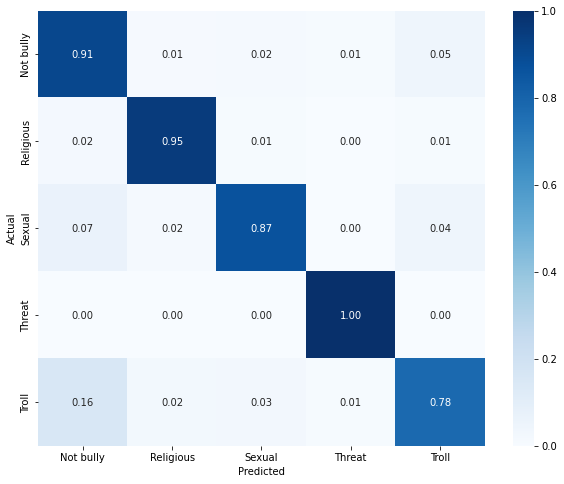

In [52]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [53]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      2301
           1       0.94      0.95      0.95      2301
           2       0.94      0.87      0.90      2301
           3       0.98      1.00      0.99      2301
           4       0.88      0.78      0.83      2301

    accuracy                           0.90     11505
   macro avg       0.91      0.90      0.90     11505
weighted avg       0.91      0.90      0.90     11505



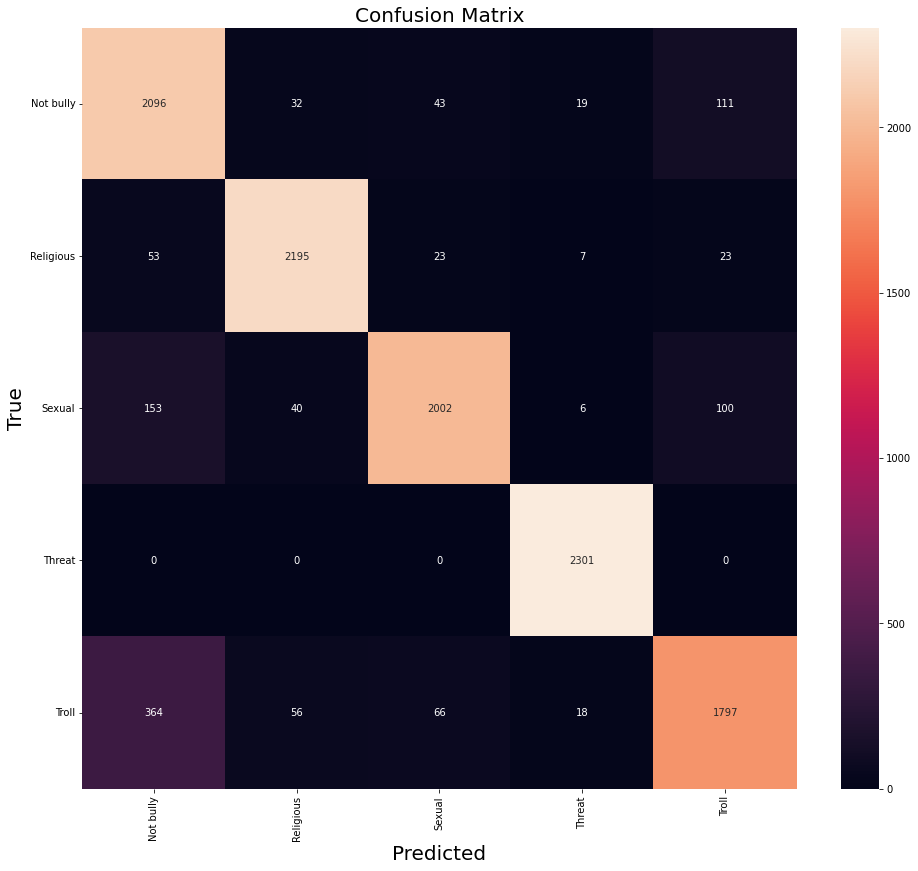

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predRF)

## Get Class Labels

class_names = ['Not bully','Religious','Sexual','Threat','Troll']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [56]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
SVC = LinearSVC()
# define the ovr strategy
#ovr = OneVsRestClassifier(SVC)
# fit model
SVC.fit(X_train, y_train)
# make predictions
y_predSVM = SVC.predict(X_test)
print('SVM')
print('Accuracy:', accuracy_score(y_test, y_predSVM))

SVM
Accuracy: 0.9147327249022165


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [57]:
cm = confusion_matrix(y_test,y_predNB)

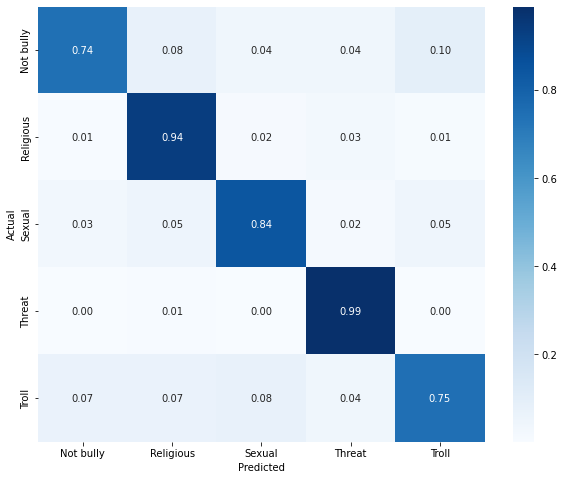

In [58]:
cm_plot_labels = ['Not bully','Religious','Sexual','Threat','Troll']
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [59]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2301
           1       0.97      0.96      0.96      2301
           2       0.92      0.90      0.91      2301
           3       0.98      1.00      0.99      2301
           4       0.89      0.82      0.85      2301

    accuracy                           0.91     11505
   macro avg       0.92      0.91      0.91     11505
weighted avg       0.92      0.91      0.91     11505



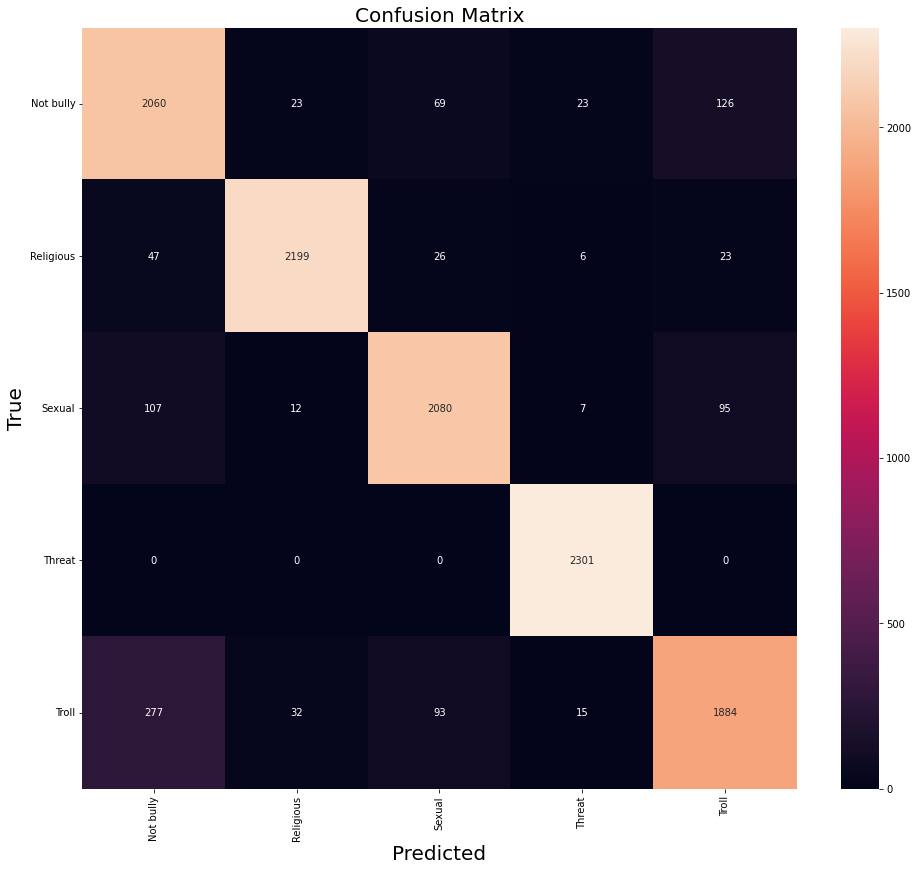

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_predSVM)

## Get Class Labels

class_names = ['Not bully','Religious','Sexual','Threat','Troll']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [61]:
print('Naive Bayes')
print('Accuracy:', accuracy_score(y_test, y_predNB))

print('Logistic regression')
print('Accuracy:', accuracy_score(y_test, y_predLR))

print('Decision Tree')
print('Accuracy:', accuracy_score(y_test, y_predDT))

print('Random Forest')
print('Accuracy:', accuracy_score(y_test, y_predRF))

print('SVM')
print('Accuracy:', accuracy_score(y_test, y_predSVM))

Naive Bayes
Accuracy: 0.8521512385919165
Logistic regression
Accuracy: 0.9087353324641461
Decision Tree
Accuracy: 0.8936983920034768
Random Forest
Accuracy: 0.9031725336810082
SVM
Accuracy: 0.9147327249022165


In [62]:
sentence = 'বোঝাই যায় প্রথম আলো প্রতিনিধি ভারতের জারজ সন্তান ।। গরুর বাচ্চা ভারত চলে যা ।,'
apl = coun_vect.transform([sentence])  

pred=MNB.predict(apl)
print(pred)

[2]


In [63]:
sentence = 'বাংলাদেশের রানের থেকে আমার গার্লফ্রেন্ড এর সংখ্যা বেশি😆একবার খেলায় নিয়ে দেখ তদের চেয়ে ভালো করে দেখাবো,কথায় নয় কাজে বিশ্বাসি🥰'
apl = coun_vect.transform([sentence])  

pred=MNB.predict(apl)
print(pred)

[4]


In [64]:
sentence = 'ইসলাম বিদ্বেষী কথা বলার কারনে তুমি সামান্য কানাডায় ঢুকতে পারলে না? চিন্তা করো জান্নাতে কিভাবে ঢুকবে?'
apl = coun_vect.transform([sentence])  

pred=MNB.predict(apl)
print(pred)

[1]


In [65]:
sentence = 'শ্রী কৃষ্ণ মানুষের গর্বে জন্মেছে ۔একজন জন্ম নেয়া মানুষ কোনোদিন সৃষ্টি কর্তা হতে পারে না'
apl = coun_vect.transform([sentence])  

pred=LR.predict(apl)
print(pred)

[1]


In [66]:
sentence = 'তুমি আর আগের মত নাই।'
apl = coun_vect.transform([sentence])  

pred=LR.predict(apl)
print(pred)

[0]


In [67]:
sentence = 'মদ খেয়ে মাতলামি করবা আর মিডিয়ায় এসে বিচার চাইবা! বাহ!!'
apl = coun_vect.transform([sentence])  

pred=SVC.predict(apl)
print(pred)

[4]


In [68]:
sentence = 'আমার জুতা, তোর মুখ। জুতা মেরে তোর অবস্থা খারাপ করে দেব।'
apl = coun_vect.transform([sentence])  

pred=SVC.predict(apl)
print(pred)

[3]


In [69]:
sentence = 'পা দুটোতে মনে হচ্ছে পোলিও হয়েছে 🤣🙏'
apl = coun_vect.transform([sentence])  

pred=SVC.predict(apl)
print(pred)

[4]


In [70]:
sentence = 'কুকুরের পেটে যেমন ঘি সহ্য হয় না তেমনি ভিখারী কে কোটিপতি বানালে সে অমানুষিকতার পরিচয় দেয়'
apl = coun_vect.transform([sentence])  

pred=DT.predict(apl)
print(pred)

[4]


In [79]:
sentence = 'চোর এর বাচ্চা চোর মাশরাফি ভোট চোর তুই যেই টাকা ও সুবিধা নিচ্ছিস তা হারাম হারাম কোরের বাচ্চা কারণ তুই অবৈধ এমপি।'
apl = coun_vect.transform([sentence])  

pred=RF.predict(apl)
print(pred)

[4]


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

In [81]:
models = ['Naive Bayes', 'Logistic regression', 'Decision Tree', 'SVM', 'Random Forest']
accuracy = [85, 90, 89, 91, 90]
color = itertools.cycle(['b','r','c', 'm','k'])

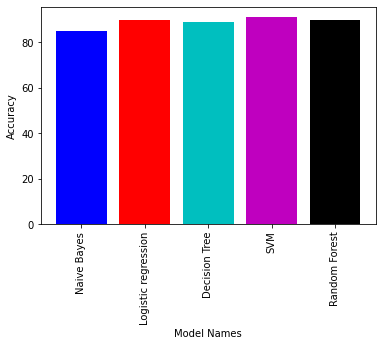

In [82]:
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
for i in range(len(models)):
    plt.bar(models[i], accuracy[i], color = next(color))
plt.show()